In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import missingno as msno
import seaborn as sns
from arcgis.gis import GIS
from arcgis.features import FeatureLayer
%matplotlib inline

# CalEnviroScreen
___
##### https://oehha.ca.gov/calenviroscreen
##### https://hub.arcgis.com/datasets/CSLC::calenviroscreen-3-0/geoservice?geometry=-147.720%2C30.991%2C-89.756%2C43.209
- Arcgis.com link provides API access.
- Pollution Indicators: PM2.5, Ozone, Diesel PM, Drinking Water, Pesticides, Tox. Release, Traffic, Cleanup Sites, Haz. Waste
- Health Indicators: Asthma, Low Birth Weight, Cardiovascular Disease
- Spatial Granularity: Census Tract
- Uses Arcgis API https://developers.arcgis.com/python/guide/install-and-set-up/

In [38]:
data_url = 'https://services1.arcgis.com/PCHfdHz4GlDNAhBb/arcgis/rest/services/CES3FINAL_AGOL/FeatureServer/1'
data_layer = FeatureLayer(data_url)
all_features = data_layer.query()

In [39]:
ces_df = all_features.sdf
ces_df

,OBJECTID,L0CalEnviroScreen_3_0_Tractdbl,L0CalEnviroScreen_3_0_TractArea,L0CalEnviroScreen_3_0_OBJECTID_,L0CalEnviroScreen_3_0_tract,L0CalEnviroScreen_3_0_pop2010,L0CalEnviroScreen_3_0_CIscore,L0CalEnviroScreen_3_0_CIscoreP,L0CalEnviroScreen_3_0_ozone,L0CalEnviroScreen_3_0_ozoneP,...,CES2018Update_changingcolumns_C,CES2018Update_changingcolumns_1,CES2018Update_changingcolumns_2,CES2018Update_changingcolumns_P,CES2018Update_changingcolumns_3,Shape__Area,Shape__Length,TractTXT,TractINT,SHAPE
0,1,6083002103,2.847611,5303,6083002103,3930,29.509728,58.519359,0.035258,16.938395,...,29.51,59.0,55-60%,47,60.0,2.847611e+06,6999.357689,6.083e+009 ...,None,"{""rings"": [[[-39795.0700999983, -341919.1909],..."
1,2,6083002402,16.352920,1301,6083002402,11406,33.173118,65.254130,0.035258,16.938395,...,33.17,65.0,65-70%,79,49.0,1.635292e+07,19100.578232,6.083e+009 ...,None,"{""rings"": [[[-39795.0700999983, -341919.1909],..."
2,3,6083002102,1.352330,5349,6083002102,2084,22.845807,44.822802,0.035258,16.938395,...,22.85,45.0,40-45%,34,50.0,1.352329e+06,4970.985897,6.083e+009 ...,None,"{""rings"": [[[-38115.7470999993, -341130.2481],..."
3,4,6083002010,2.417717,5823,6083002010,4375,4.452888,2.421491,0.035258,16.938395,...,4.45,2.0,1-5% (lowest scores),2,7.0,2.417717e+06,6558.956012,6.083e+009 ...,None,"{""rings"": [[[-37341.6616000012, -348530.4371],..."
4,5,6083002009,2.608422,6349,6083002009,3826,5.280336,3.430445,0.035258,16.938395,...,5.28,3.0,1-5% (lowest scores),1,14.0,2.608422e+06,6570.368730,6.083e+009 ...,None,"{""rings"": [[[-39465.1072999984, -348499.2619],..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8030,8031,6037430302,1.938016,5274,6037430302,5837,18.148938,33.547736,0.053109,73.926571,...,18.15,34.0,30-35%,49,26.0,1.938016e+06,7166.130635,6.03743e+009 ...,None,"{""rings"": [[[185152.883200001, -426843.0644], ..."
8031,8032,6037430723,0.485563,4960,6037430723,4118,15.611208,26.787741,0.051243,69.234599,...,15.61,27.0,25-30%,53,18.0,4.855630e+05,3941.781806,6.03743e+009 ...,None,"{""rings"": [[[179874.000599999, -429709.1902], ..."
8032,8033,6037431100,3.015661,2951,6037431100,6629,40.077631,76.201286,0.053109,73.926571,...,40.08,76.0,75-80%,95,50.0,3.015661e+06,8020.091253,6.03743e+009 ...,None,"{""rings"": [[[184530.475499999, -428031.2406], ..."
8033,8034,6037533603,0.811896,3418,6037533603,6617,57.847726,95.257914,0.046178,53.018046,...,57.85,95.0,95-100% (highest scores),94,84.0,8.118955e+05,4949.116808,6.03753e+009 ...,None,"{""rings"": [[[167498.880199999, -447404.3511], ..."


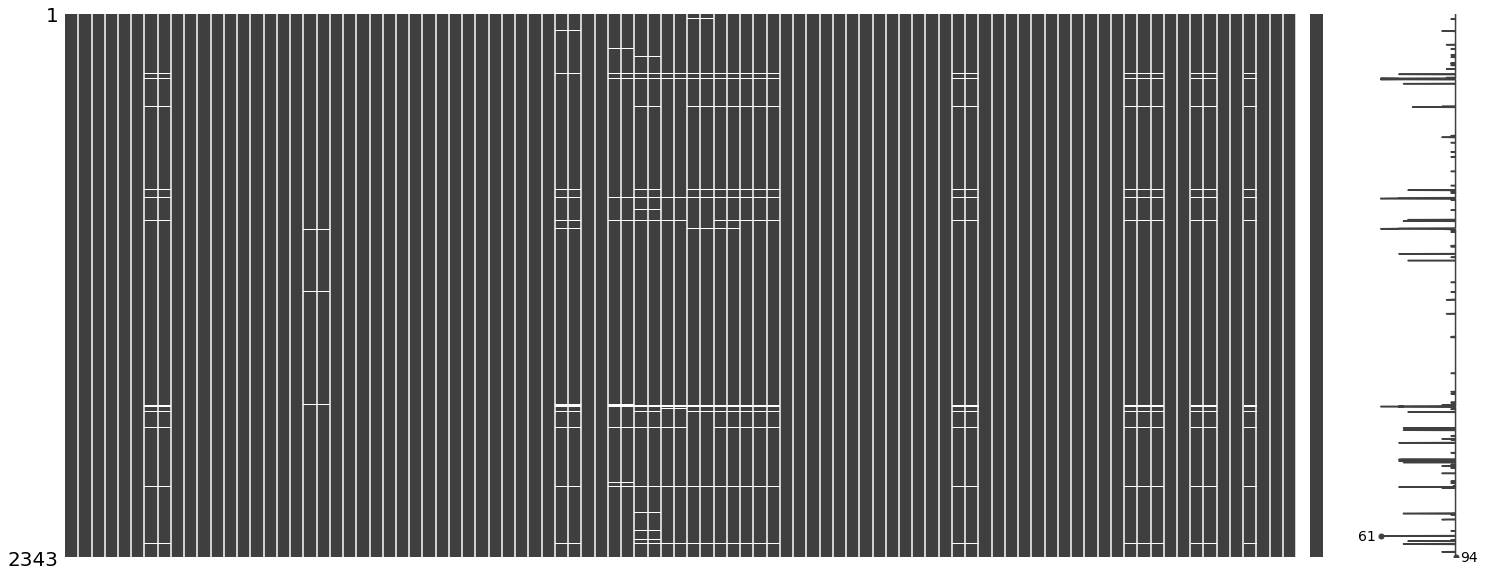

In [51]:
lac_df = ces_df[ces_df['L0CalEnviroScreen_3_0_Tractdbl'].astype(str).str.startswith('6037')]
msno.matrix(lac_df)

In [40]:
ces_df.columns

Index(['OBJECTID', 'L0CalEnviroScreen_3_0_Tractdbl',
       'L0CalEnviroScreen_3_0_TractArea', 'L0CalEnviroScreen_3_0_OBJECTID_',
       'L0CalEnviroScreen_3_0_tract', 'L0CalEnviroScreen_3_0_pop2010',
       'L0CalEnviroScreen_3_0_CIscore', 'L0CalEnviroScreen_3_0_CIscoreP',
       'L0CalEnviroScreen_3_0_ozone', 'L0CalEnviroScreen_3_0_ozoneP',
       'L0CalEnviroScreen_3_0_pm', 'L0CalEnviroScreen_3_0_pmP',
       'L0CalEnviroScreen_3_0_diesel', 'L0CalEnviroScreen_3_0_dieselP',
       'L0CalEnviroScreen_3_0_pest', 'L0CalEnviroScreen_3_0_pestP',
       'L0CalEnviroScreen_3_0_RSEIhaz', 'L0CalEnviroScreen_3_0_RSEIhazP',
       'L0CalEnviroScreen_3_0_traffic', 'L0CalEnviroScreen_3_0_trafficP',
       'L0CalEnviroScreen_3_0_drink', 'L0CalEnviroScreen_3_0_drinkP',
       'L0CalEnviroScreen_3_0_cleanups', 'L0CalEnviroScreen_3_0_cleanupsP',
       'L0CalEnviroScreen_3_0_gwthreats', 'L0CalEnviroScreen_3_0_gwthrea_1',
       'L0CalEnviroScreen_3_0_haz', 'L0CalEnviroScreen_3_0_hazP',
       'L0CalE

In [44]:
air_cols_to_keep = ['L0CalEnviroScreen_3_0_tract', 'L0CalEnviroScreen_3_0_ozone', 'L0CalEnviroScreen_3_0_pm', 'L0CalEnviroScreen_3_0_diesel']
air_cols_to_drop = [col for col in ces_df.columns if col not in air_cols_to_keep]

health_cols_to_keep = ['L0CalEnviroScreen_3_0_tract', 'L0CalEnviroScreen_3_0_asthma', 'L0CalEnviroScreen_3_0_lbw', 'L0CalEnviroScreen_3_0_cvd']
health_cols_to_drop = [col for col in ces_df.columns if col not in health_cols_to_keep]

In [45]:
ces_air_df = ces_df.drop(air_cols_to_drop, axis=1)
ces_air_df.columns = ['Census tract', 'Ozone', 'PM2.5', 'Diesel']
ces_air_df['Census tract'] = ces_air_df['Census tract'].apply(str)
ces_air_df = ces_air_df[ces_air_df['Census tract'].str.startswith('6037')]
ces_air_df

,Census tract,Ozone,PM2.5,Diesel
5692,6037920336,0.064889,10.370000,9.071850
5693,6037920044,0.064889,9.955483,25.560952
5694,6037573003,0.042299,11.210000,29.120000
5695,6037571704,0.042299,11.210000,21.637831
5696,6037570403,0.042299,12.050000,29.030000
...,...,...,...,...
8030,6037430302,0.053109,10.370000,6.649666
8031,6037430723,0.051243,10.370000,11.290000
8032,6037431100,0.053109,10.790000,15.588629
8033,6037533603,0.046178,12.050000,23.100000


In [47]:
ces_health_df = ces_df.drop(health_cols_to_drop, axis=1)
ces_health_df.columns = ['Census tract', 'Asthma', 'LBW', 'CVD']
ces_health_df['Census tract'] = ces_health_df['Census tract'].apply(str)
ces_health_df = ces_health_df[ces_health_df['Census tract'].str.startswith('6037')]
ces_health_df

,Census tract,Asthma,LBW,CVD
5692,6037920336,24.67,4.78,7.90
5693,6037920044,32.05,3.26,11.93
5694,6037573003,87.72,6.45,9.81
5695,6037571704,71.39,6.20,8.80
5696,6037570403,75.70,5.59,9.45
...,...,...,...,...
8030,6037430302,38.64,4.15,8.55
8031,6037430723,18.19,2.56,5.32
8032,6037431100,37.78,3.96,8.27
8033,6037533603,46.57,4.83,9.72


In [55]:
combined_data_df = pd.merge(ces_air_df, ces_health_df)
combined_data_df

,Census tract,Ozone,PM2.5,Diesel,Asthma,LBW,CVD
0,6037920336,0.064889,10.370000,9.071850,24.67,4.78,7.90
1,6037920044,0.064889,9.955483,25.560952,32.05,3.26,11.93
2,6037573003,0.042299,11.210000,29.120000,87.72,6.45,9.81
3,6037571704,0.042299,11.210000,21.637831,71.39,6.20,8.80
4,6037570403,0.042299,12.050000,29.030000,75.70,5.59,9.45
...,...,...,...,...,...,...,...
2338,6037430302,0.053109,10.370000,6.649666,38.64,4.15,8.55
2339,6037430723,0.051243,10.370000,11.290000,18.19,2.56,5.32
2340,6037431100,0.053109,10.790000,15.588629,37.78,3.96,8.27
2341,6037533603,0.046178,12.050000,23.100000,46.57,4.83,9.72


In [57]:
correlation = combined_data_df.corr().abs()
correlation

,Ozone,PM2.5,Diesel,Asthma,LBW,CVD
Ozone,1.000000,0.616032,0.319846,0.067966,0.083880,0.035991
PM2.5,0.616032,1.000000,0.342897,0.060764,0.004944,0.171488
Diesel,0.319846,0.342897,1.000000,0.162470,0.099538,0.002205
Asthma,0.067966,0.060764,0.162470,1.000000,0.429369,0.710558
LBW,0.083880,0.004944,0.099538,0.429369,1.000000,0.227161
CVD,0.035991,0.171488,0.002205,0.710558,0.227161,1.000000


In [58]:
correlation = correlation.drop(correlation.index[[3,4,5]])
correlation = correlation.drop(correlation.columns[[0,1,2]], axis=1)
correlation

,Asthma,LBW,CVD
Ozone,0.067966,0.083880,0.035991
PM2.5,0.060764,0.004944,0.171488
Diesel,0.162470,0.099538,0.002205


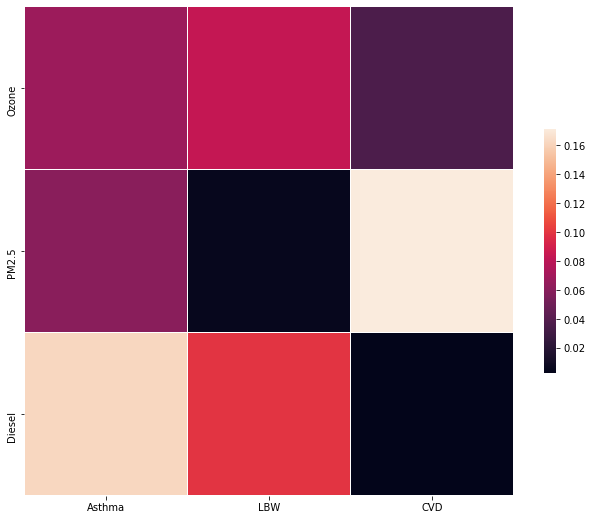

In [59]:
f, ax = plt.subplots(figsize=(11, 9))

sns.heatmap(correlation,square=True, linewidths=.5, cbar_kws={"shrink": .5})